In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("uber_data.csv")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [5]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
99995,1,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,1,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,1,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,2,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16
99999,1,2016-03-01 06:17:11,2016-03-01 06:22:00,1,1.00,-73.990685,40.750473,1,N,-73.980354,40.754910,2,6.0,0.0,0.5,0.00,0.00,0.3,6.80


In [6]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [8]:
df = df.fillna(0)

In [39]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [41]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].drop_duplicates().reset_index(drop=True)

In [42]:
datetime_dim

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2016-03-01 00:00:00,2016-03-01 00:07:55
1,2016-03-01 00:00:00,2016-03-01 00:11:06
2,2016-03-01 00:00:00,2016-03-01 00:31:06
3,2016-03-01 00:00:00,2016-03-01 00:00:00
4,2016-03-01 00:00:01,2016-03-01 00:16:04
...,...,...
99848,2016-03-01 06:17:10,2016-03-01 06:22:15
99849,2016-03-01 06:17:10,2016-03-01 06:32:41
99850,2016-03-01 06:17:10,2016-03-01 06:37:23
99851,2016-03-01 06:17:10,2016-03-01 06:22:09


In [43]:
datetime_dim['pick_hour']=datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day']=datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month']=datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year']=datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday']=datetime_dim['tpep_pickup_datetime'].dt.weekday

In [44]:
datetime_dim['drop_hour']=datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day']=datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month']=datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year']=datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday']=datetime_dim['tpep_dropoff_datetime'].dt.weekday

In [45]:
datetime_dim['datetime_id']=datetime_dim.index

In [46]:
datetime_dim = datetime_dim[['datetime_id','tpep_pickup_datetime','pick_hour','pick_day','pick_month','pick_year','pick_weekday','tpep_dropoff_datetime','drop_hour','drop_day','drop_month','drop_year','drop_weekday']]

In [47]:
datetime_dim #segregated into sections

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01 00:00:01,0,1,3,2016,1,2016-03-01 00:16:04,0,1,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99848,99848,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:22:15,6,1,3,2016,1
99849,99849,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:32:41,6,1,3,2016,1
99850,99850,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:37:23,6,1,3,2016,1
99851,99851,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:22:09,6,1,3,2016,1


In [48]:
passenger_count_dim = df[['passenger_count']].drop_duplicates().reset_index(drop=True)

In [49]:
passenger_count_dim

,passenger_count
0,1
1,2
2,3
3,5
4,6
5,4
6,0


In [50]:
passenger_count_dim['passenger_count_id']=passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]


In [51]:
trip_distance_dim = df[['trip_distance']].drop_duplicates().reset_index(drop=True)
trip_distance_dim['trip_distance_id']=trip_distance_dim.index

In [52]:
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [53]:
passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,2
2,2,3
3,3,5
4,4,6


In [54]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [55]:
rate_code_type={
    1:'Standard rate',
    2:'JFK',
    3:'Newark',
    4:'Nassu or Westchester',
    5:'Negotiated fare',
    6:'Group ride'
}
rate_code_dim = df[['RatecodeID']].drop_duplicates().reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name']=rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

In [56]:
rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,3,Newark
2,2,2,JFK
3,3,5,Negotiated fare
4,4,4,Nassu or Westchester


In [57]:
pickup_location_dim = df[['pickup_longitude','pickup_latitude']].drop_duplicates().reset_index(drop=True)

In [58]:
pickup_location_dim['pickup_location_id']=pickup_location_dim.index
pickup_location_dim= pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]

In [59]:
pickup_location_dim

,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741
...,...,...,...
98050,98050,40.750519,-73.990898
98051,98051,40.718296,-74.014488
98052,98052,40.774097,-73.963379
98053,98053,40.763111,-73.984901


In [60]:
dropoff_location_dim = df[['dropoff_longitude','dropoff_latitude']].drop_duplicates().reset_index(drop=True)
dropoff_location_dim['dropoff_location_id']=dropoff_location_dim.index
dropoff_location_dim= dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [61]:
dropoff_location_dim

,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170
...,...,...,...
98412,98412,40.750462,-73.998245
98413,98413,40.752529,-73.982361
98414,98414,40.770512,-73.865028
98415,98415,40.759148,-73.970695


In [62]:
payment_type_name = {
    1:'Credit Card',
    2:'Cash',
    3:'No charge',
    4:'Dispute',
    5:'Unknown',
    6:'Voided trip'
}
payment_type_dim = df[['payment_type']].drop_duplicates().reset_index(drop=True)
payment_type_dim['payment_type_id']=payment_type_dim.index
payment_type_dim['payment_type_name']=payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [106]:
payment_type_dim['payment_type_id'].mean()

1.5

In [64]:
fact_table = df.merge(passenger_count_dim, on='passenger_count') \
             .merge(trip_distance_dim, on='trip_distance') \
             .merge(rate_code_dim, on='RatecodeID') \
             .merge(pickup_location_dim, on=['pickup_longitude', 'pickup_latitude']) \
             .merge(dropoff_location_dim, on=['dropoff_longitude', 'dropoff_latitude'])\
             .merge(datetime_dim, on=['tpep_pickup_datetime','tpep_dropoff_datetime']) \
             .merge(payment_type_dim, on='payment_type') \
             [['VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [65]:
fact_table.head()

,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,2,1491,0,0,0,N,1481,1484,0,10.5,0.0,0.5,2.26,0.0,0.3,13.56
2,2,2834,0,0,0,N,2816,2819,0,9.5,0.0,0.5,1.25,0.0,0.3,11.55
3,2,3488,0,0,0,N,3465,3470,0,13.5,0.0,0.5,2.00,0.0,0.3,16.30
4,2,3923,0,0,0,N,3899,3903,0,10.5,0.0,0.5,2.26,0.0,0.3,13.56


In [66]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.88327,1.929170,3.034270,-73.288983,40.375220,1.040120,-73.312418,40.388064,1.337770,13.252608,0.101695,0.497000,1.872531,0.367415,0.299496,16.390721
std,0.32110,1.589408,3.846951,7.089652,3.901413,0.284238,6.964171,3.833974,0.481356,11.685574,0.202166,0.042673,2.618611,1.527758,0.016642,14.437180
min,1.00000,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-47.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-47.300000
25%,2.00000,1.000000,0.990000,-73.990959,40.738891,1.000000,-73.990547,40.738541,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.00000,1.000000,1.670000,-73.980202,40.755299,1.000000,-73.978416,40.755079,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.00000,2.000000,3.200000,-73.964203,40.769021,1.000000,-73.962090,40.767910,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,18.300000
max,2.00000,6.000000,184.400000,0.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000


In [67]:
numerical_columns = ['trip_distance', 'fare_amount', 'tip_amount']

summary_stats = df[numerical_columns].agg(['mean', 'median', 'std'])
print("Summary Statistics for Numerical Variables:\n")
print(summary_stats)


Summary Statistics for Numerical Variables:

        trip_distance  fare_amount  tip_amount
mean         3.034270    13.252608    1.872531
median       1.670000     9.500000    1.360000
std          3.846951    11.685574    2.618611


In [68]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

sns.set(style="whitegrid")

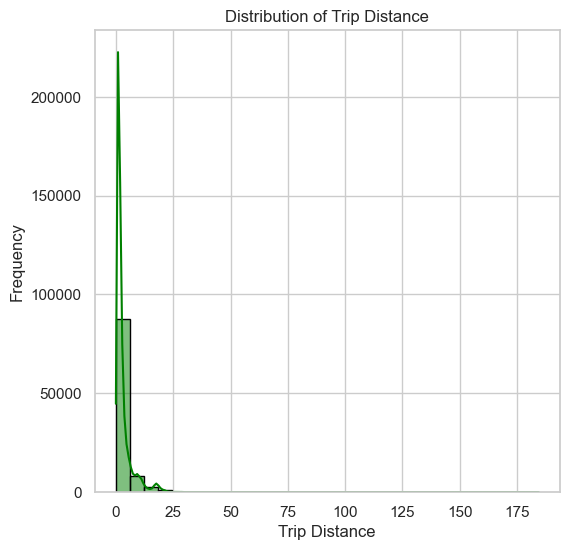

In [80]:
plt.figure(figsize=(6, 6))
sns.histplot(df['trip_distance'], bins=30, color='green', edgecolor='black', kde=True)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance')
plt.show()

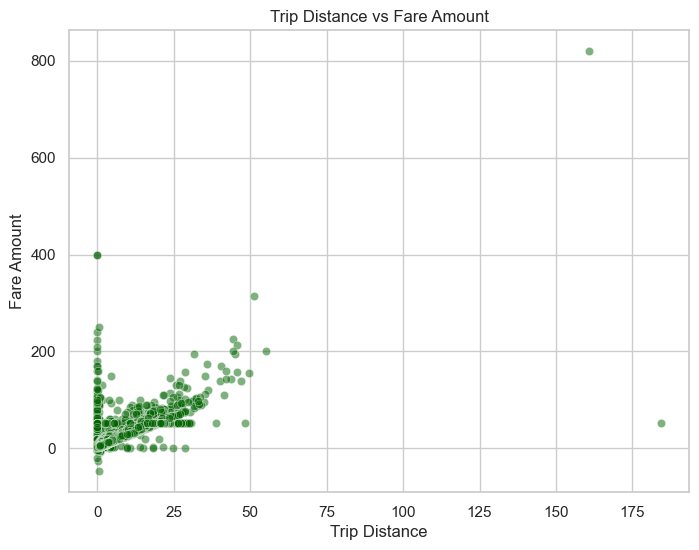

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5, color="darkgreen")
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()

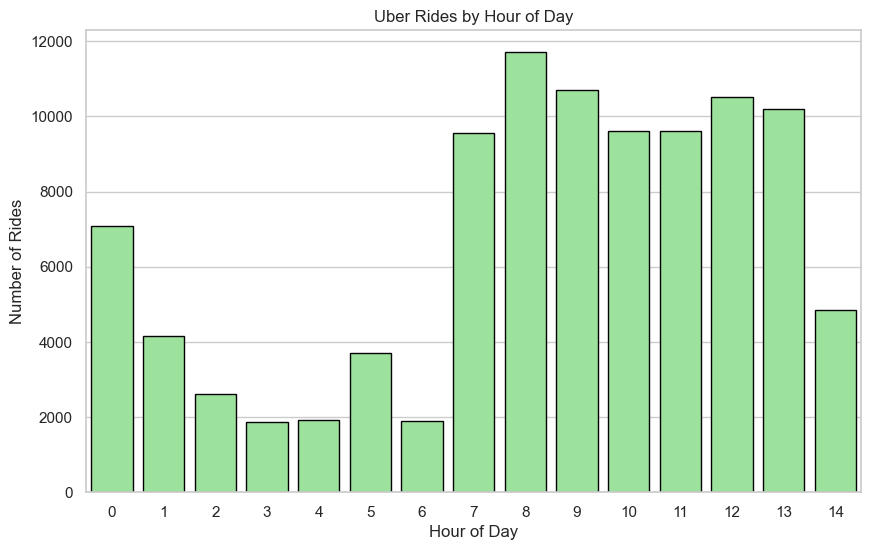

In [71]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df, color='lightgreen', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Uber Rides by Hour of Day')
plt.show()

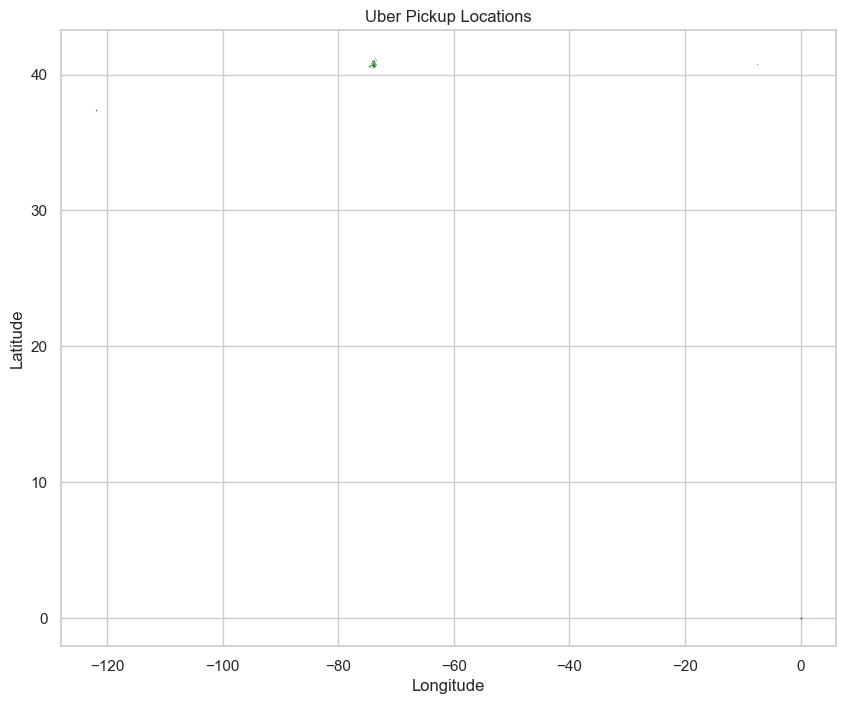

In [72]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, color='darkgreen', alpha=0.5, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Uber Pickup Locations')
plt.show()

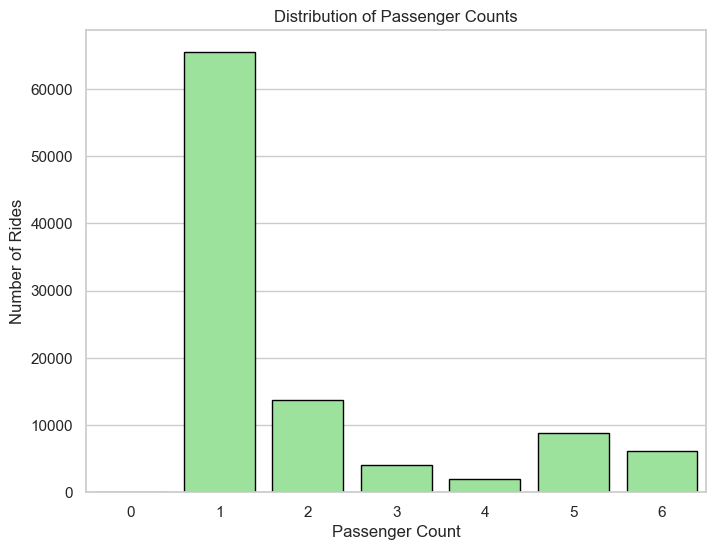

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='passenger_count', data=df, color='lightgreen', edgecolor="black")
plt.xlabel('Passenger Count')
plt.ylabel('Number of Rides')
plt.title('Distribution of Passenger Counts')
plt.show()

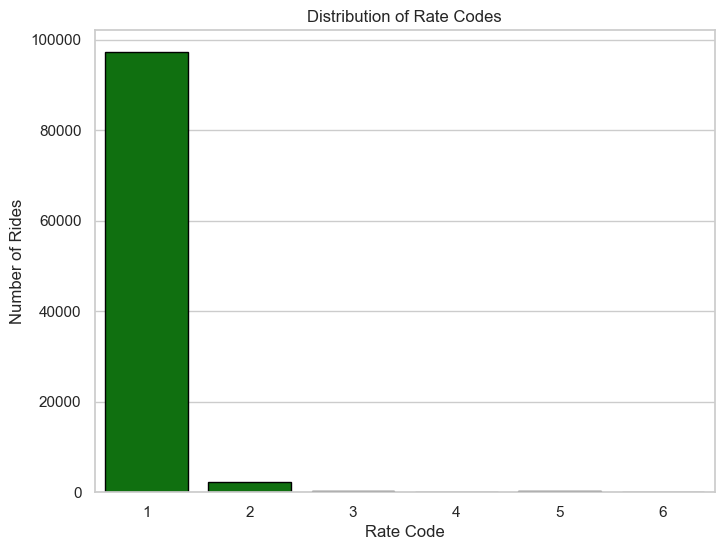

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RatecodeID', data=df, color='green', edgecolor="black")
plt.xlabel('Rate Code')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rate Codes')
plt.show()

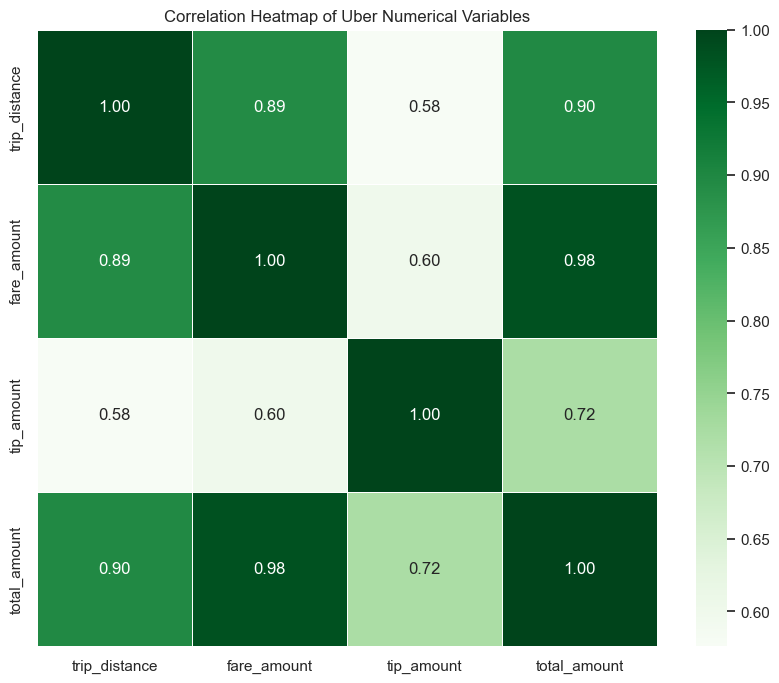

In [75]:
numerical_vars = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
corr_matrix = df[numerical_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Uber Numerical Variables')
plt.show()

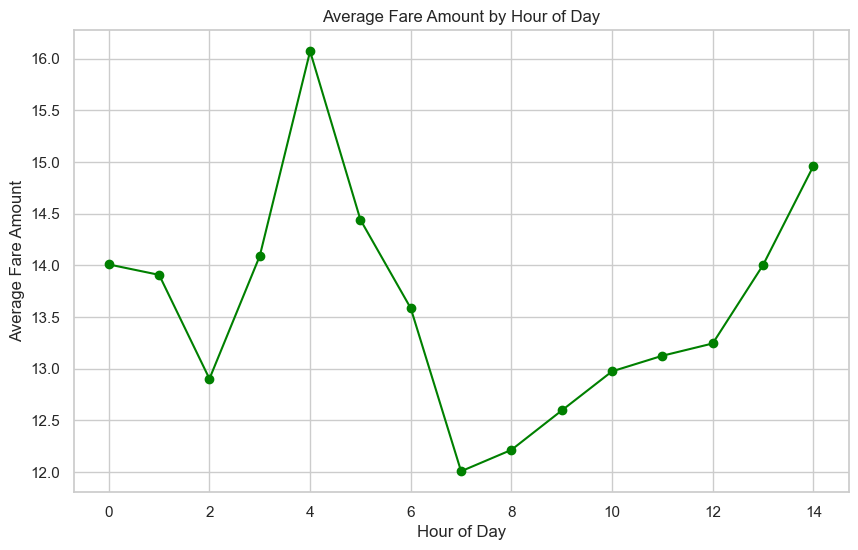

In [77]:
hourly_fare_avg = df.groupby('pickup_hour')['fare_amount'].mean()

# Plotting average fare amount by pickup hour
plt.figure(figsize=(10, 6))
hourly_fare_avg.plot(marker='o',color="green")
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Hour of Day')
plt.grid(True)
plt.show()